## Utilisation d’un réseau de neurones

In [45]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from joblib import dump, load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

# ploting option
plt.rcParams['figure.figsize'] = [12.94, 8]
plt.rcParams['figure.dpi'] = 100 
#plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

SAVE_FIGS = True

In [46]:
dataset_dry = pd.read_csv('my_final_dry_data.csv')
dataset_dry.head()

,particle_density,texture,porosity,series,conductivity,depth_lower,OM_content,k_sat,theta_sat,pH,...,P2,P50,P100,P250,P500,P1000,P2000,rho,suction,theta
0,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.2,0.804,0.997,1.61,122.0,0.1220
1,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.2,0.804,0.997,1.61,0.0,0.4178
2,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.2,0.804,0.997,1.61,5.0,0.3744
3,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.2,0.804,0.997,1.61,12.0,0.3505
4,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.2,0.804,0.997,1.61,24.0,0.2657


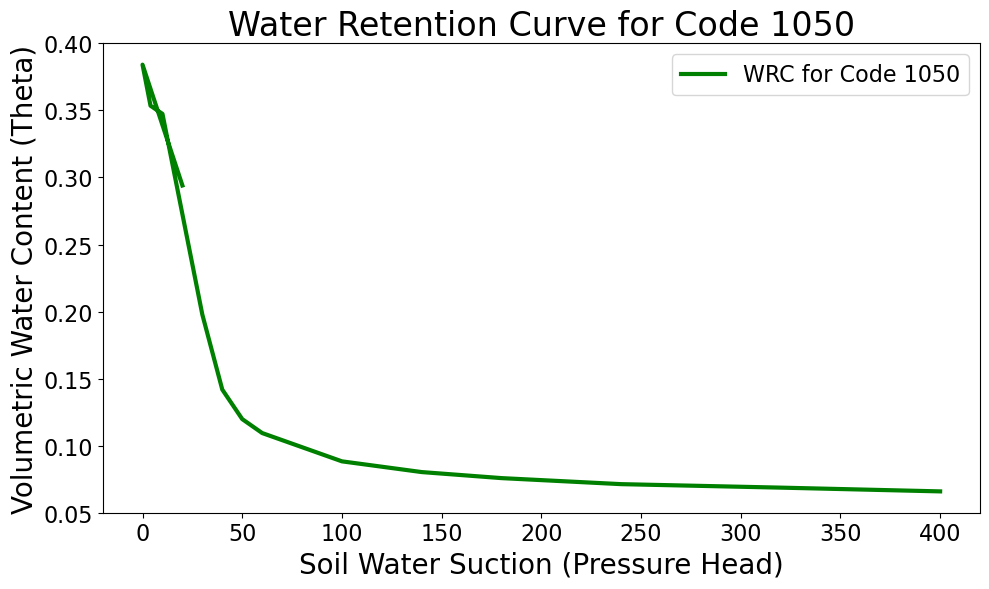

In [47]:
code_specific = 1050
filtered_data = dataset_dry[dataset_dry['code'] == code_specific]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['suction'], filtered_data['theta'], label='WRC for Code 1050', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 1050')
plt.legend()
plt.show()


In [48]:
dataset_dry.columns

Index(['particle_density', 'texture', 'porosity', 'series', 'conductivity',
       'depth_lower', 'OM_content', 'k_sat', 'theta_sat', 'pH', 'location',
       'depth_upper', 'code', 'P2', 'P50', 'P100', 'P250', 'P500', 'P1000',
       'P2000', 'rho', 'suction', 'theta'],
      dtype='object')

In [49]:
dataset_dry.dropna(axis=0, inplace=True)
dataset_dry

,particle_density,texture,porosity,series,conductivity,depth_lower,OM_content,k_sat,theta_sat,pH,...,P2,P50,P100,P250,P500,P1000,P2000,rho,suction,theta
0,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.200,0.804000,0.997,1.61,122.0,0.1220
1,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.200,0.804000,0.997,1.61,0.0,0.4178
2,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.200,0.804000,0.997,1.61,5.0,0.3744
3,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.200,0.804000,0.997,1.61,12.0,0.3505
4,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.045,0.1,0.121,0.173,0.200,0.804000,0.997,1.61,24.0,0.2657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.000,0.0,0.000,0.348,0.591,0.907857,1.000,1.81,30.0,0.1540
698,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.000,0.0,0.000,0.348,0.591,0.907857,1.000,1.81,31.0,0.1450
699,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.000,0.0,0.000,0.348,0.591,0.907857,1.000,1.81,31.0,0.1420
700,2.65,12.0,0.44,33.0,1.656,61.0,0.75,88.992,0.418,7.3,...,0.000,0.0,0.000,0.348,0.591,0.907857,1.000,1.81,36.0,0.0960


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP(dataset_dry, hidden_layers=(10,), print_coefs=True, max_iter=1000000):
    X = dataset_dry[['P2', 'P50', 'P100', 'P250', 'P500', 'P1000', 'P2000', 'rho', 'suction', 'code']]
    Y = dataset_dry['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # we take off code to avoid data leakage, another solution would be to use it as index like prof suggested
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=max_iter, random_state=42)
    model.fit(X_train_no_code, Y_train)
    
    Yhat_train = model.predict(X_train_no_code)
    Yhat_test = model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    return model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [51]:
def graph_real_and_predicted(X_train, X_test, Y_train, Y_test, Yhat, Yhat_test, fname=None):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.plot(Y_train, Yhat,'r.')
    ax.plot(Y_train, Y_train,'k-')
    ax.set_xlabel('Training values')
    ax.set_ylabel('Predicted values')
    ax = fig.add_subplot(122)
    ax.plot(Y_test, Yhat_test,'b.')
    ax.plot(Y_test, Y_test,'k-')
    ax.set_xlabel('Testing values')
    ax.set_ylabel('Predicted values')
    if fname is not None:
        plt.savefig(fname + '.pdf')
        plt.show()
    plt.close()

In [52]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP(dataset_dry, [100])


Train Loss: 0.0043, Test Loss: 0.0036


In [53]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")


Model R^2 Score on Test Set: 0.7631


In [54]:
##wrc curve

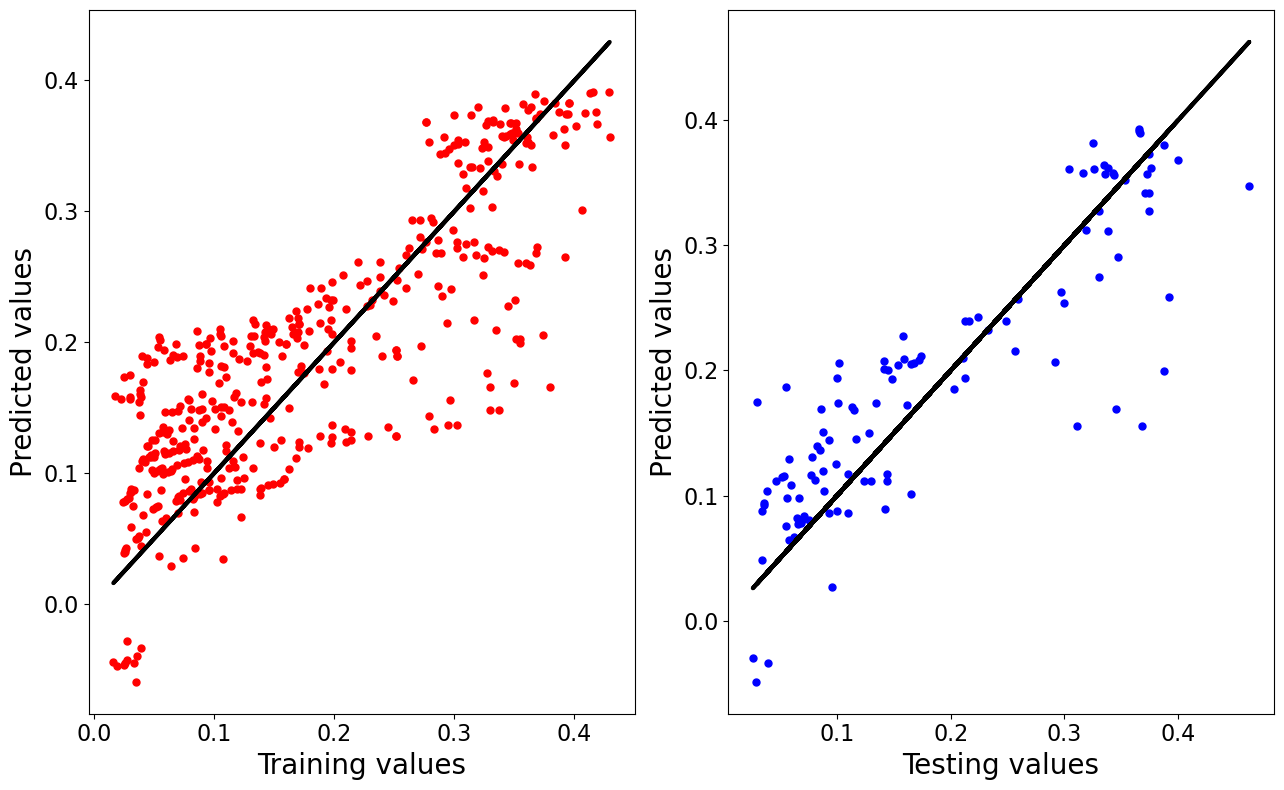

In [55]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [56]:
print('Testing the model with a sample input:')
input_features = [0.1,0.2,0.3,0.5,0.6,1,1.7,0.1, 2.0] 
print(model.predict([input_features]))

Testing the model with a sample input:
[0.61230291]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [57]:
dump(model, 'model_2.joblib')

['model_2.joblib']

In [58]:
#test (reload model + prediction):
model = load('model_2.joblib') 
print('testing the model reloaded:')
print(model.predict([[0,0.1,0.2,0.3,0.5,0.6,1,1.7,100]]))

testing the model reloaded:
[0.12221207]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [59]:
import matplotlib.pyplot as plt

#inspired from teacher

def plot_predicted_vs_real(Y_test, Yhat_test):
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test, Yhat_test, alpha=0.5, label='Predicted vs Real')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal')
    plt.xlabel('Real Value')
    plt.ylabel('Predicted Value')
    plt.title('Predicted vs Real Values')
    plt.legend()
    plt.show()

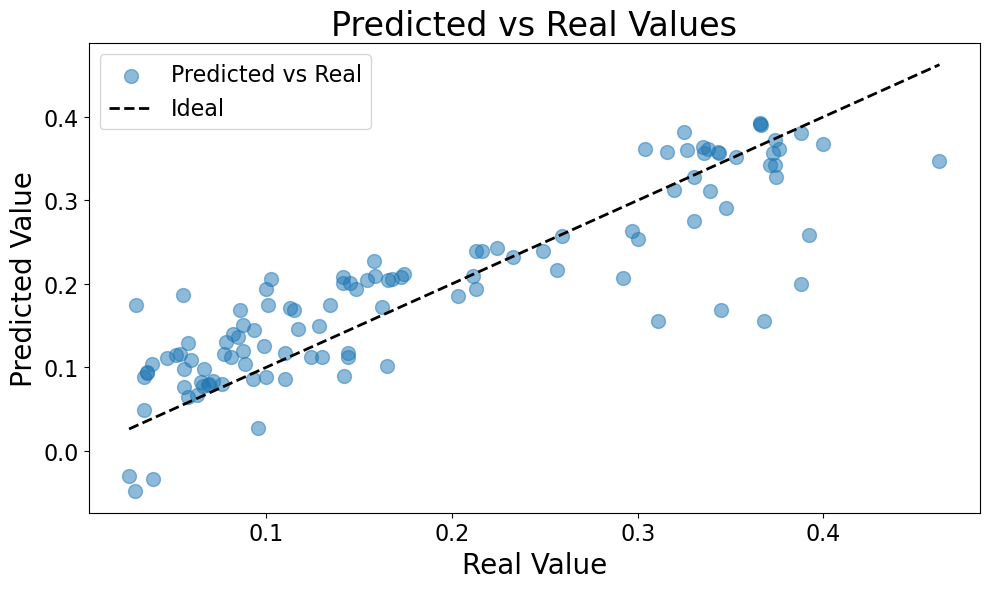

In [60]:
plot_predicted_vs_real(Y_test, Yhat_test)

In [61]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


In [62]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

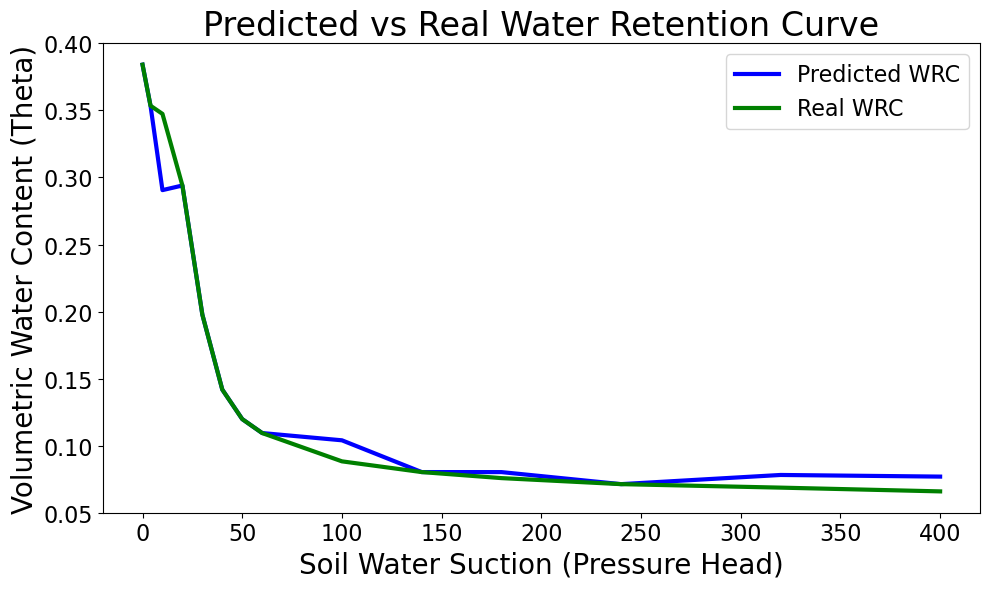

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()

## Adding GridsearchCV

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP_with_GridSearchCV(dataset_dry, print_coefs=True):
    X = dataset_dry[['P2', 'P50', 'P100', 'P250', 'P500', 'P1000', 'P2000', 'rho', 'suction', 'code']]
    Y = dataset_dry['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(random_state=42)
    parameter_space = {
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'max_iter': [1000, 5000, 10000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
    }
    
    clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
    clf.fit(X_train_no_code, Y_train)
    
    best_model = clf.best_estimator_
    
    Yhat_train = best_model.predict(X_train_no_code)
    Yhat_test = best_model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f"Best parameters found: {clf.best_params_}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return best_model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [65]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP_with_GridSearchCV(dataset_dry)


Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Train Loss: 0.0038, Test Loss: 0.0034


In [66]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")

Model R^2 Score on Test Set: 0.7727


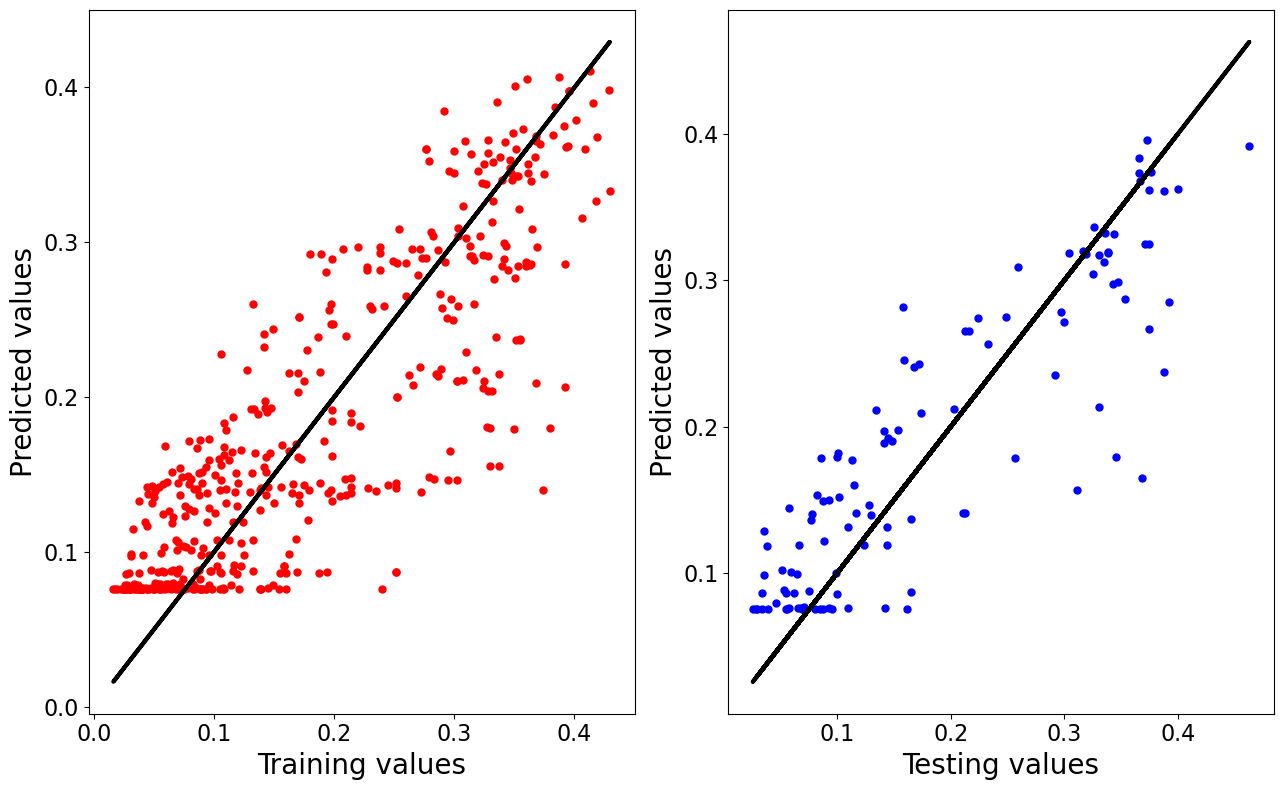

In [67]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [68]:
print('Testing the model with a sample input:')
input_features = [0.1,0.2,0.3,0.5,0.6,1,1.7,0.1, 2.0] 
print(model.predict([input_features]))

Testing the model with a sample input:
[0.85200601]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [69]:
dump(model, 'model_2_dry.joblib')

['model_2_dry.joblib']

In [70]:
#test (reload model + prediction):
model = load('model_2_dry.joblib') 
print('testing the model reloaded:')
print(model.predict([[0,0.1,0.2,0.3,0.5,0.6,1,1.7,100]]))

testing the model reloaded:
[0.12804146]


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


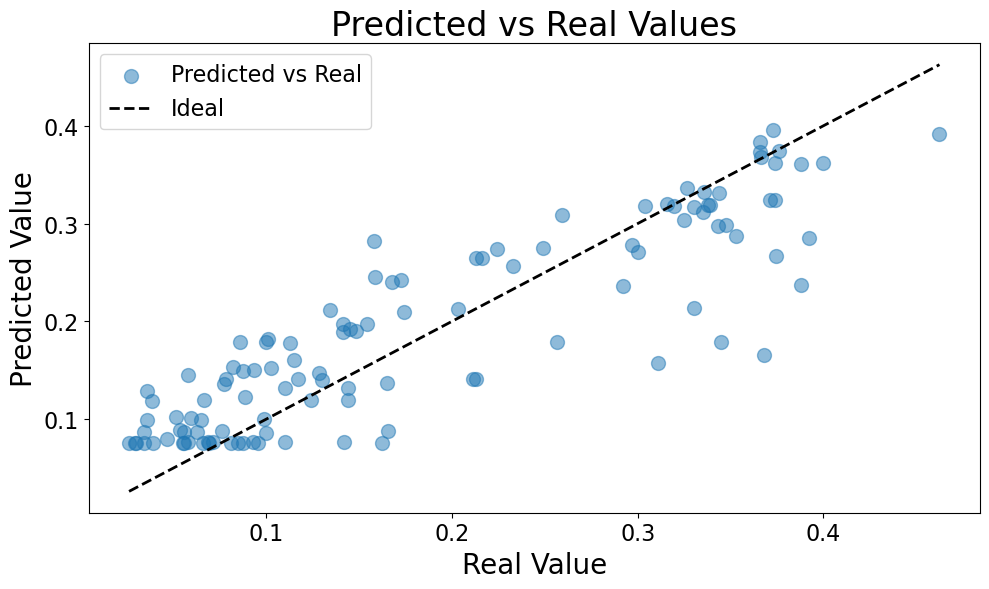

In [71]:
plot_predicted_vs_real(Y_test, Yhat_test)

In [72]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


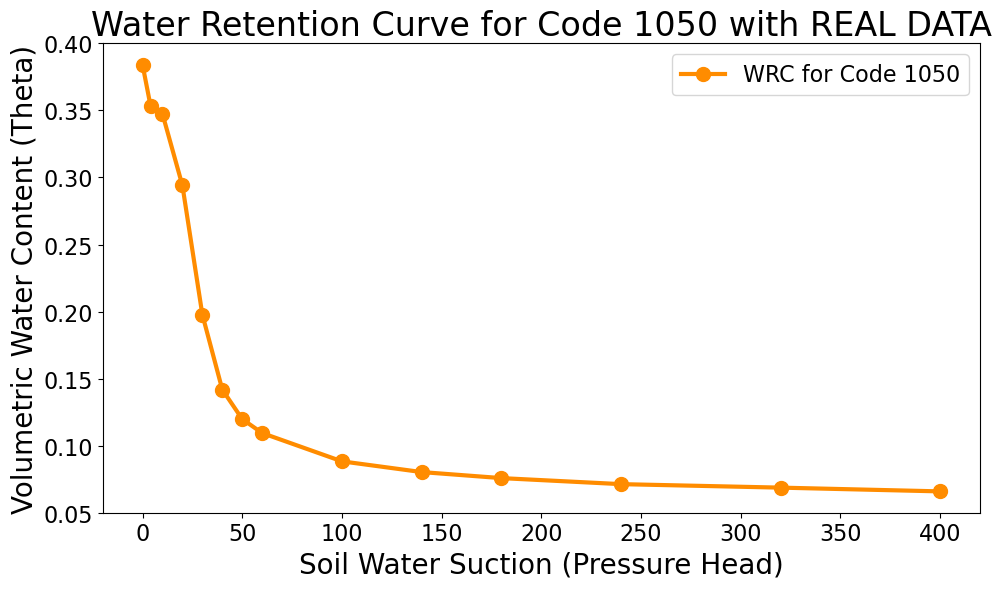

In [73]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted, label='WRC for Code 1050', marker='o', linestyle='-', color='darkorange')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 1050 with REAL DATA')
plt.legend()
plt.show()


In [74]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

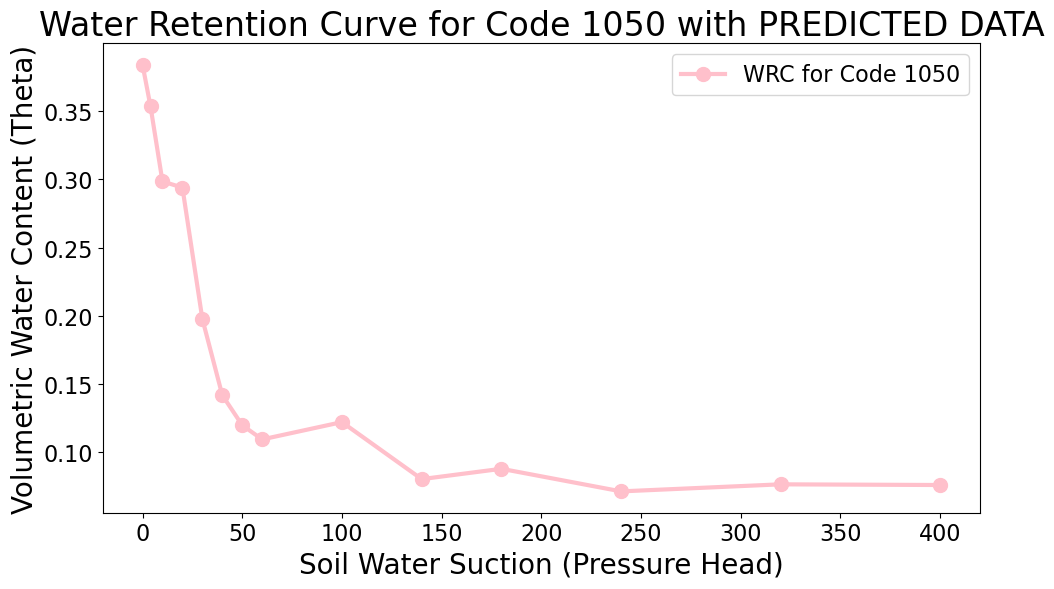

In [75]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='WRC for Code 1050', marker='o', linestyle='-', color='pink')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 1050 with PREDICTED DATA')
plt.legend()
plt.show()


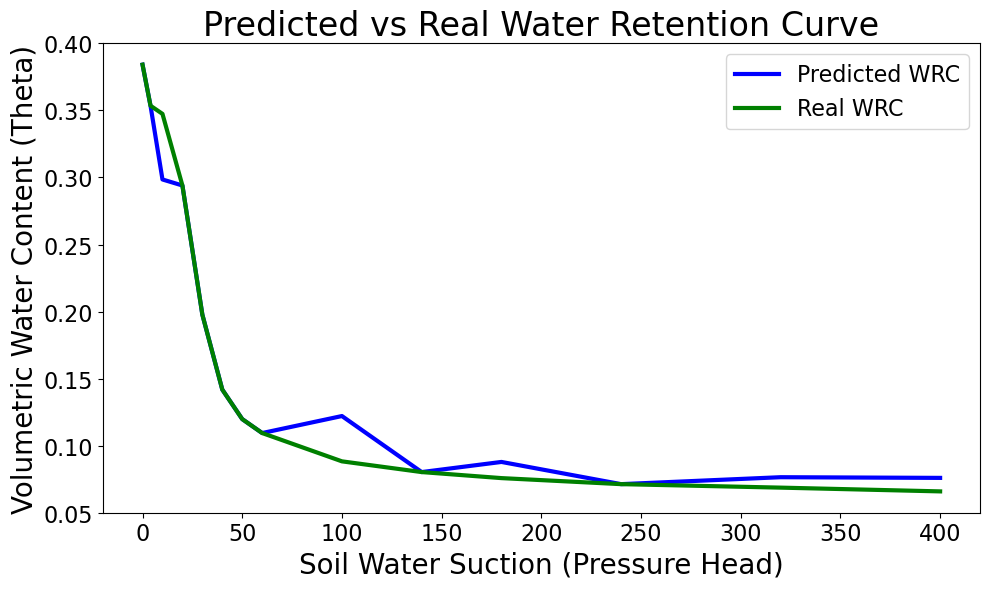

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()

## Adding other features 

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

def model_theta_MLP_with_GridSearchCV(dataset_dry, print_coefs=True):
    X = dataset_dry.drop(['theta'], axis =1)
    Y = dataset_dry['theta']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    X_train_no_code = X_train.drop(columns=['code'])
    X_test_no_code = X_test.drop(columns=['code'])
    
    model = MLPRegressor(random_state=42)
    parameter_space = {
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'max_iter': [1000, 5000, 10000],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
    }
    
    clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
    clf.fit(X_train_no_code, Y_train)
    
    best_model = clf.best_estimator_
    
    Yhat_train = best_model.predict(X_train_no_code)
    Yhat_test = best_model.predict(X_test_no_code)
    
    train_loss = mean_squared_error(Y_train, Yhat_train)
    test_loss = mean_squared_error(Y_test, Yhat_test)
    print(f"Best parameters found: {clf.best_params_}")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    return best_model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss


In [78]:

model, X_train, X_test, Y_train, Y_test, Yhat_train, Yhat_test, train_loss, test_loss = model_theta_MLP_with_GridSearchCV(dataset_dry)


Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
Train Loss: 0.0095, Test Loss: 0.0218


In [79]:
print(f"Model R^2 Score on Test Set: {model.score(X_test.drop(['code'],axis=1), Y_test):.4f}")

Model R^2 Score on Test Set: -0.4505


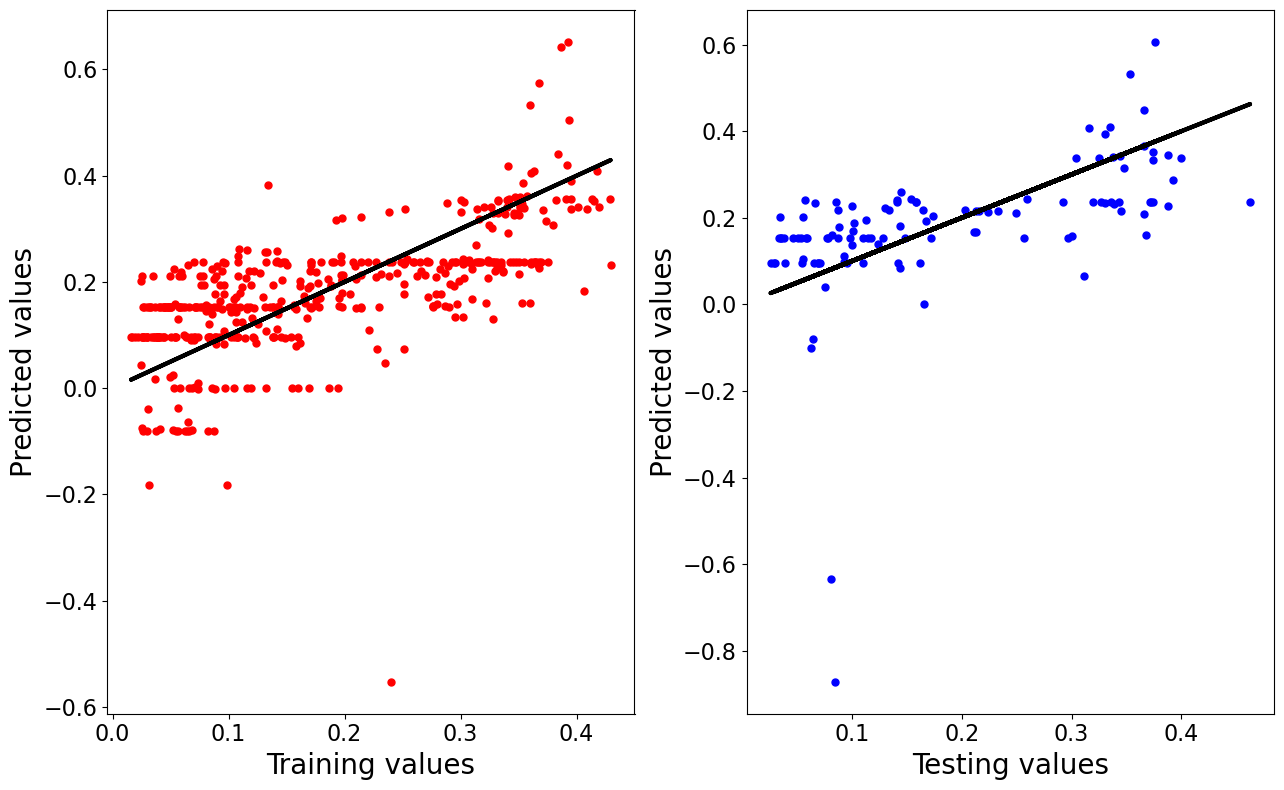

In [80]:
graph_real_and_predicted(X_train.drop(['code'],axis=1), X_test.drop(['code'],axis=1), Y_train, Y_test, Yhat_train, Yhat_test, fname='result_1')

In [81]:
dump(model, 'model_2_dry_full.joblib')

['model_2_dry_full.joblib']

In [82]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Y_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted = combined_data_filtered_sorted['theta']


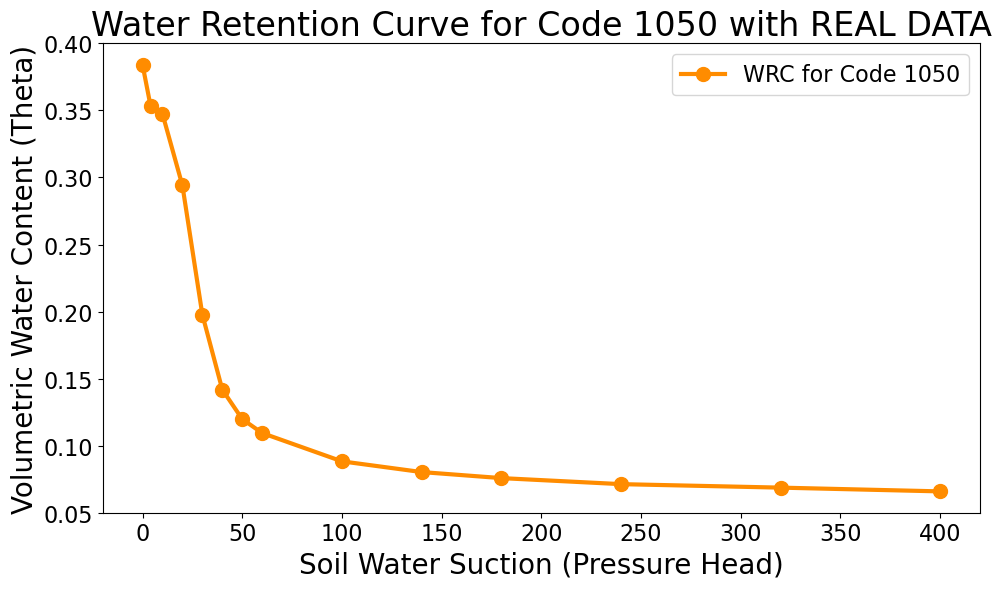

In [83]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted, label='WRC for Code 1050', marker='o', linestyle='-', color='darkorange')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 1050 with REAL DATA')
plt.legend()
plt.show()


In [84]:
combined_data = pd.concat([
    X_train[['suction', 'code']].assign(theta=Y_train),
    X_test[['suction', 'code']].assign(theta=Yhat_test)
])

code_specific = 1050
combined_data_filtered = combined_data[combined_data['code'] == code_specific]

combined_data_filtered_sorted = combined_data_filtered.sort_values(by='suction')

suction_sorted = combined_data_filtered_sorted['suction']
theta_sorted_hat = combined_data_filtered_sorted['theta']

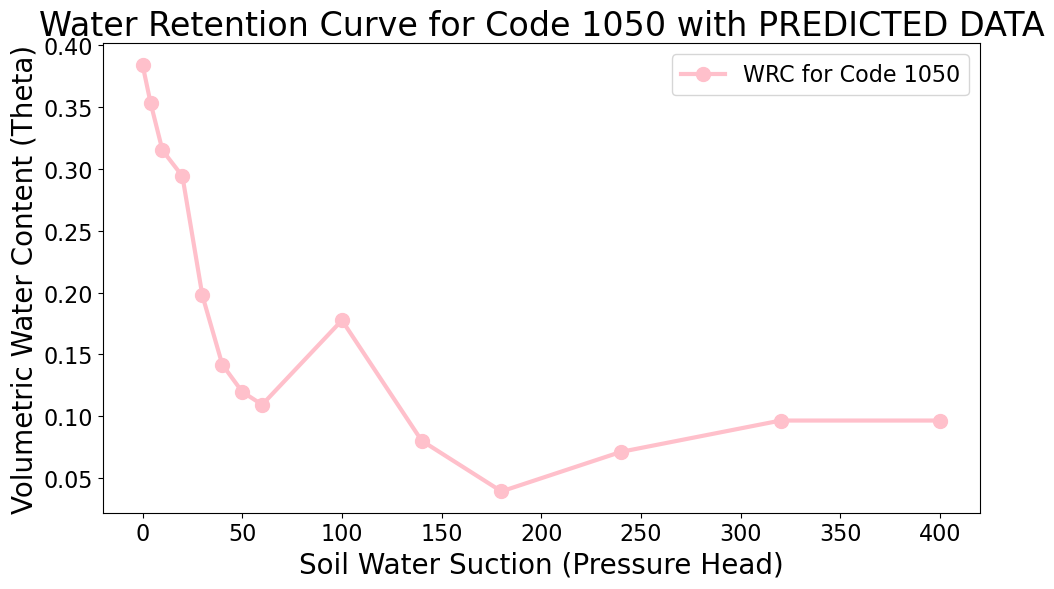

In [85]:

plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='WRC for Code 1050', marker='o', linestyle='-', color='pink')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Water Retention Curve for Code 1050 with PREDICTED DATA')
plt.legend()
plt.show()


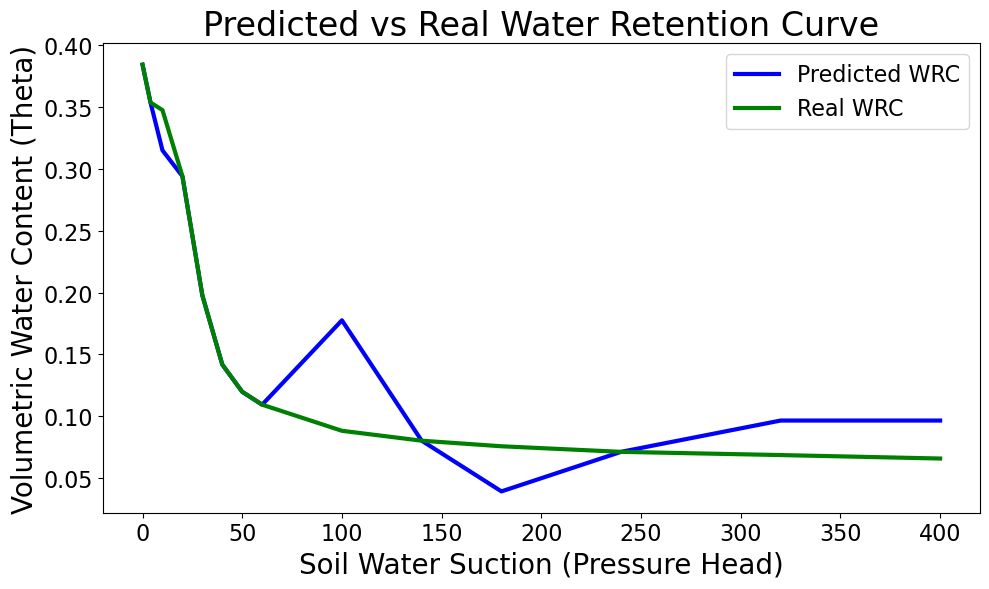

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(suction_sorted, theta_sorted_hat, label='Predicted WRC', color='blue')
plt.plot(suction_sorted, theta_sorted, label='Real WRC', color='green')
plt.xlabel('Soil Water Suction (Pressure Head)')
plt.ylabel('Volumetric Water Content (Theta)')
plt.title('Predicted vs Real Water Retention Curve')
plt.legend()
plt.show()